### Codebook for study 2.

#### Aims: a higher power study N = 500 per cell, all else identical as pilot 2.

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#### descriptive

In [2]:
# read data: study2 processed spreadsheet.
df_processed = pd.read_excel('study2data.xlsx',sheet_name=7)

# descriptive summary.
df_processed.groupby(['condition']).size()

condition
random_meet         502
self_select         502
yoke_both           500
yoke_choice_only    501
dtype: int64

#### choices

In [3]:
# read data: study2 choice spreadsheet
df_choice = pd.read_excel('study2data.xlsx',sheet_name=8)

# re-order: rank by times of choosing each group.
countdf = df_choice.groupby(['participant', 'choice','condition']).count()
reorderdf = countdf.sort_values(by=['participant', 'choice1'], ascending=False)
reorderdf['reorder'] = reorderdf.groupby(['participant']).cumcount()+1; reorderdf
reorder_choicedf = reorderdf.reset_index()
print(reorder_choicedf)

      participant choice         condition  round  choice1  reorder
0            2005   Weki  yoke_choice_only     17       17        1
1            2005   Aima  yoke_choice_only      9        9        2
2            2005   Tufa  yoke_choice_only      9        9        3
3            2005   Reku  yoke_choice_only      5        5        4
4            2004   Aima  yoke_choice_only     10       10        1
...           ...    ...               ...    ...      ...      ...
7433            2   Reku       self_select      2        2        4
7434            1   Tufa       self_select     13       13        1
7435            1   Weki       self_select     13       13        2
7436            1   Aima       self_select      7        7        3
7437            1   Reku       self_select      7        7        4

[7438 rows x 6 columns]


In [4]:
reorder_choicedf.groupby(['condition','reorder']).mean()

participant      round    choice1
condition        reorder                                   
random_meet      1         753.500000  10.000000  10.000000
                 2         753.500000  10.000000  10.000000
                 3         753.500000  10.000000  10.000000
                 4         753.500000  10.000000  10.000000
self_select      1         251.500000  19.543825  19.543825
                 2         252.663043  10.141304  10.141304
                 3         251.071594   7.565820   7.565820
                 4         251.310263   5.556086   5.556086
yoke_both        1        1254.500000  19.566000  19.566000
                 2        1255.576419  10.144105  10.144105
                 3        1253.909513   7.556845   7.556845
                 4        1254.110312   5.549161   5.549161
yoke_choice_only 1        1755.000000  19.560878  19.560878
                 2        1756.119826  10.141612  10.141612
                 3        1754.490741   7.560185   7.560185
                 4        1754.710526   5.547847   5.547847

<Figure size 432x288 with 0 Axes>

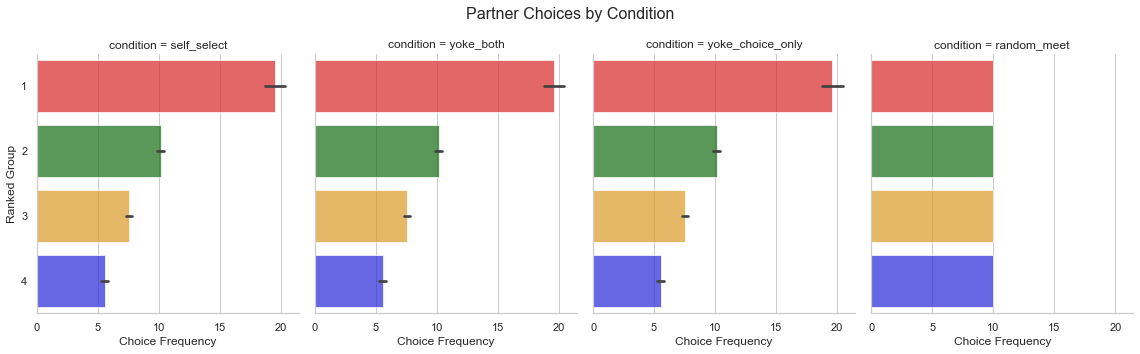

In [7]:
# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Main plot
g = sns.catplot(y="reorder",x="choice1",col='condition',
                data=reorder_choicedf, kind="bar", orient="h",
                col_order=["self_select", "yoke_both", "yoke_choice_only", "random_meet"],
                height=5, aspect=.8, saturation=.7,
                alpha=.7, palette=['red','green','orange','blue']); 
# Change labels
g.set_xlabels('Choice Frequency', fontsize=12)
g.set_ylabels('Ranked Group', fontsize=12)

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Partner Choices by Condition', fontsize=16)
g.savefig('fig4a.pdf', dpi=500)

Text(0.5, 0.98, 'condition = self_select')

<Figure size 432x288 with 0 Axes>

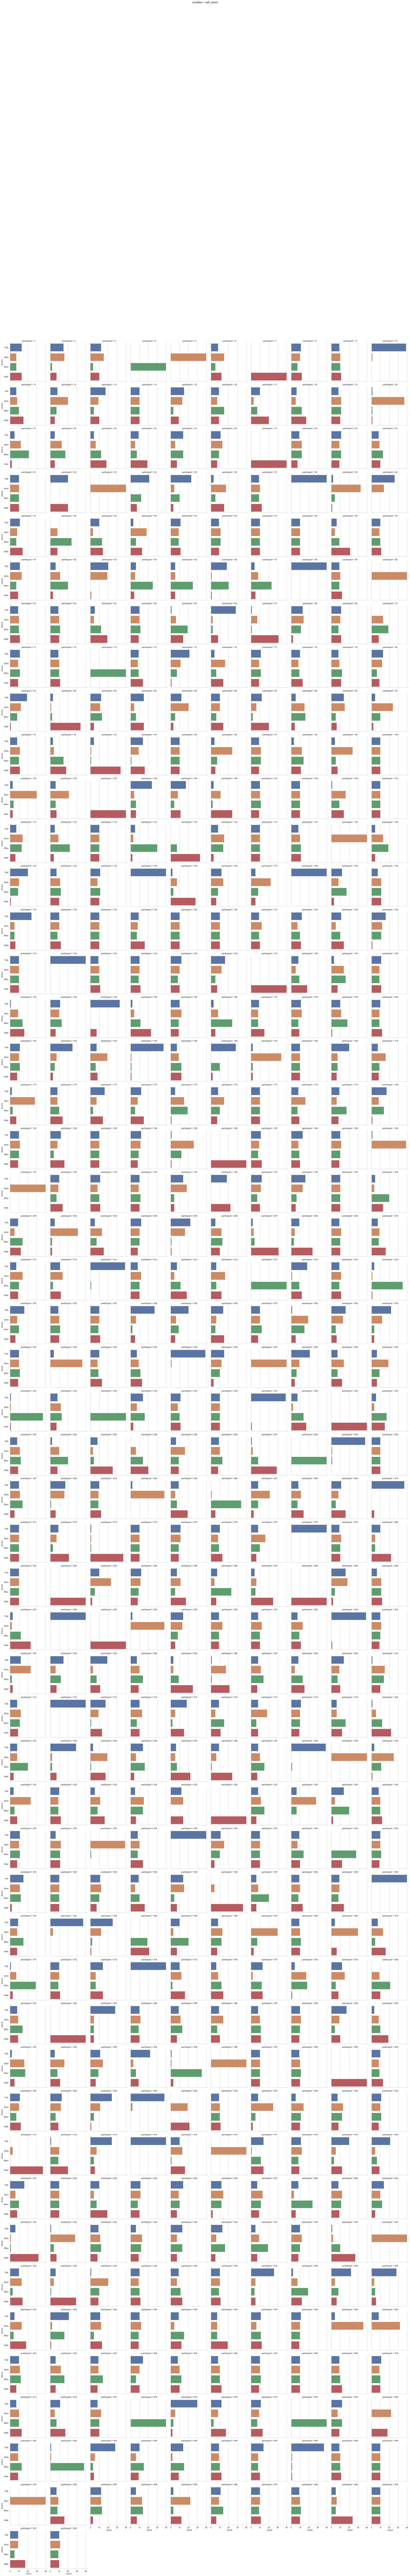

In [7]:
# plot per participant (caution: time-consuming!)

pp_df = df_choice.loc[(df_choice['condition'] == 'self_select')]

# Initialize the figure
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Count plot
g = sns.catplot(y="choice", col="participant", col_wrap = 10,
                data=pp_df, kind="count",
                height=4, aspect=.8,
                order=['Tufa','Aima','Reku','Weki']);

# Add title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('condition = self_select')

#### reward estimates

In [8]:
# read data: study2 dollar spreadsheet
df_dollar = pd.read_excel('study2data.xlsx',sheet_name=9)

# reorder: by reward ranks
reorder_reward_df = df_dollar.sort_values(by=['participant','reward_estimate'], ascending=False)
reorder_reward_df['reorder'] = reorder_reward_df.groupby(['participant']).cumcount()+1; reorder_reward_df
reorder_dollardf=reorder_reward_df.reset_index()
print(reorder_dollardf)

      index         condition  participant group  reward_estimate  reorder
0      8019  yoke_choice_only         2005  Weki              100        1
1      7017  yoke_choice_only         2005  Aima               95        2
2      6516  yoke_choice_only         2005  Tufa               90        3
3      7518  yoke_choice_only         2005  Reku               80        4
4      6515  yoke_choice_only         2004  Tufa              100        1
...     ...               ...          ...   ...              ...      ...
8015   1005       self_select            2  Reku               72        4
8016      0       self_select            1  Tufa               81        1
8017   1506       self_select            1  Weki               76        2
8018    502       self_select            1  Aima               60        3
8019   1004       self_select            1  Reku               20        4

[8020 rows x 6 columns]


In [9]:
reorder_dollardf.groupby(['condition','reorder']).mean()

index  participant  reward_estimate
condition        reorder                                      
random_meet      1        2877.5        753.5        90.117530
                 2        3018.5        753.5        84.470120
                 3        3015.5        753.5        76.996016
                 4        3134.5        753.5        68.173307
self_select      1         908.5        251.5        83.922311
                 2         954.5        251.5        71.589641
                 3        1028.5        251.5        61.735060
                 4        1122.5        251.5        52.013944
yoke_both        1        4907.5       1254.5        88.776000
                 2        4974.5       1254.5        75.094000
                 3        5059.5       1254.5        64.740000
                 4        5120.5       1254.5        53.518000
yoke_choice_only 1        6940.0       1755.0        90.634731
                 2        7032.0       1755.0        78.840319
                 3        7009.0       1755.0        69.912176
                 4        7089.0       1755.0        59.087824

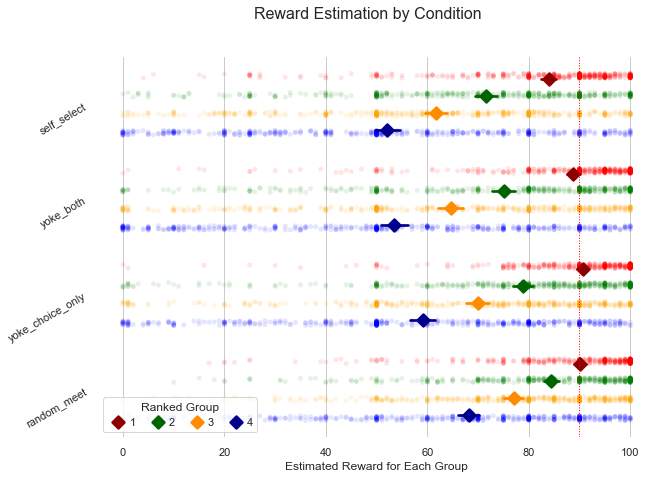

In [10]:
# reward estimate (rank reordered)

# Initialize the figure
f, ax = plt.subplots()
f.set_size_inches(10,7)
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="reward_estimate", y="condition", hue="reorder",
              order=["self_select", "yoke_both", "yoke_choice_only", "random_meet"],
              data=reorder_dollardf, dodge=True, alpha=0.1, zorder=1, palette=['red','green','orange','blue'])

# Show the conditional means
sns.pointplot(x="reward_estimate", y="condition", hue="reorder",
              order=["self_select", "yoke_both", "yoke_choice_only", "random_meet"],
              data=reorder_dollardf, dodge=.532, join=False,
              markers="D", scale=1.25, ci=95, alpha = 0.9, palette=['darkred','darkgreen','darkorange','darkblue'])
              
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[4:], labels[4:], title="Ranked Group",
          handletextpad=0, columnspacing=1,
          loc="lower left", ncol=4, frameon=True)   
plt.yticks(rotation=30)

# Add ground truth lines
plt.axvline(x=90, color='red', ls=':', lw=1)
#plt.axvline(x=50, color='green', ls=':', lw=1)
#plt.axvline(x=30, color='orange', ls=':', lw=1)
#plt.axvline(x=10, color='blue', ls=':', lw=1)

# Add title
f.suptitle('Reward Estimation by Condition',fontsize=16)
ax.set_xlabel('Estimated Reward for Each Group', fontsize=12)
ax.set_ylabel('')
f.savefig('fig4b.pdf', dpi=500)


#### choice herfindhal & reward variance

In [22]:
reorder_choicedf
p_herf = []
for i in range (1,2006):
    pp_df = reorder_choicedf.loc[reorder_choicedf['participant'] == i]['choice1'].tolist()
    if len(pp_df) == 4:
        p_herf.append(1 - ((pp_df[0]/40)**2 + (pp_df[1]/40)**2 + (pp_df[2]/40)**2 + (pp_df[3]/40)**2))
    elif len(pp_df) == 3:
        p_herf.append(1 - ((pp_df[0]/40)**2 + (pp_df[1]/40)**2 + (pp_df[2]/40)**2 + 0))
    elif len(pp_df) == 2:
        p_herf.append(1 - ((pp_df[0]/40)**2 + (pp_df[1]/40)**2 + 0 + 0))
    else:
        p_herf.append(1 - ((pp_df[0]/40)**2 + 0 + 0 + 0))


# reorder_dollardf.
p_var = []
for i in range(1,2006):
    pp_df = reorder_dollardf.loc[reorder_dollardf['participant'] == i]['reward_estimate'].tolist()
    p_var.append(np.std(pp_df))

    
# transformed_df
DV_df = pd.DataFrame(list(zip(p_herf, p_var)),
              columns=['choice_herf', 'reward_var'])

IV_df = df_dollar.loc[df_dollar['group'] == 'Tufa'][['condition','participant']].reset_index(drop=True)

transformed_df = pd.concat([IV_df, DV_df], axis=1)
transformed_df.to_csv('study2transformed.csv') # use for stats.R

In [23]:
transformed_df

,condition,participant,choice_herf,reward_var
0,self_select,1,0.72750,23.951774
1,self_select,2,0.66625,3.960745
2,self_select,3,0.70125,29.243589
3,self_select,4,0.00000,31.617835
4,self_select,5,0.00000,40.703194
...,...,...,...,...
2000,yoke_choice_only,2001,0.74875,6.495191
2001,yoke_choice_only,2002,0.74875,5.000000
2002,yoke_choice_only,2003,0.58625,20.180436
2003,yoke_choice_only,2004,0.75000,7.361216


Text(0.5, 0.98, 'Choosing diverse or non-diverse partners')

<Figure size 432x288 with 0 Axes>

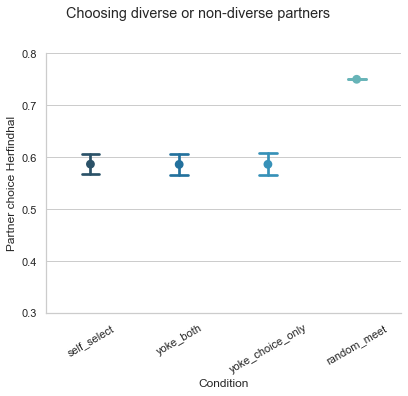

In [24]:
# transformed_df

# Choice
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

g = sns.catplot(x="condition", y="choice_herf",
                capsize=.2, palette="YlGnBu_d", height=5, aspect=1.2,
                order=["self_select", "yoke_both", "yoke_choice_only", "random_meet"],
                kind="point", data=transformed_df)
g.set(ylim=(0.3, 0.8))
g.set_xticklabels(rotation=30)

plt.subplots_adjust(top=0.85)
g.set_axis_labels("Condition", "Partner choice Herfindhal")
g.fig.suptitle('Choosing diverse or non-diverse partners')

Text(0.5, 0.98, 'Estimating similar or dis-similar rewards')

<Figure size 432x288 with 0 Axes>

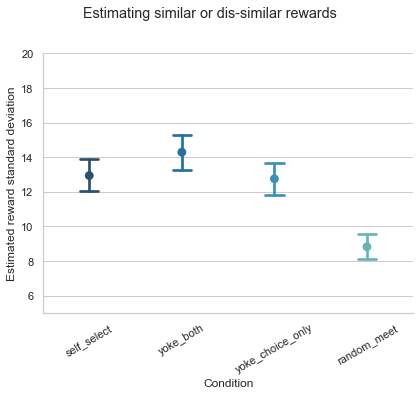

In [25]:
# transformed_df

DV_df = pd.DataFrame(list(zip(p_var)),
              columns=['reward_var'])

IV_df = df_dollar.loc[df_dollar['group'] == 'Tufa'][['condition','participant']].reset_index(drop=True)

transformed_df = pd.concat([IV_df, DV_df], axis=1)
transformed_df.to_csv('aaa.csv')

# Choice
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

g = sns.catplot(x="condition", y="reward_var",
                capsize=.2, palette="YlGnBu_d", height=5, aspect=1.2,
                order=["self_select", "yoke_both", "yoke_choice_only", "random_meet"],
                kind="point", data=transformed_df)
g.set(ylim=(5, 20))
g.set_xticklabels(rotation=30)

plt.subplots_adjust(top=0.85)
g.set_axis_labels("Condition", "Estimated reward standard deviation")
g.fig.suptitle('Estimating similar or dis-similar rewards')

#### warmth and competence

Text(0.5, 0.98, 'Perceiving similar or dis-similar warmth and competence')

<Figure size 432x288 with 0 Axes>

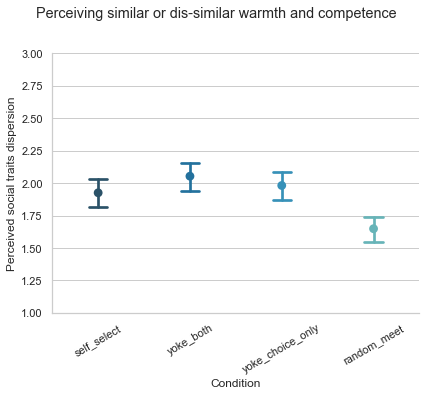

In [26]:
# read study2 scm spreadsheet
scm_df = pd.read_excel('study2data.xlsx',sheet_name=10)

# Choice
sns.set(style="whitegrid", font_scale=1)
sns.despine(bottom=True, left=True)

g = sns.catplot(x="condition", y="SCMdispersion",
                capsize=.2, palette="YlGnBu_d", height=5, aspect=1.2,
                order=["self_select", "yoke_both", "yoke_choice_only", "random_meet"],
                kind="point", data=scm_df)
g.set(ylim=(1, 3))
g.set_xticklabels(rotation=30)

plt.subplots_adjust(top=0.85)
g.set_axis_labels("Condition", "Perceived social traits dispersion")
g.fig.suptitle('Perceiving similar or dis-similar warmth and competence')